In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [2]:
#   from tensorflow.keras.callbacks import EarlyStopping

In [3]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

<Axes: >

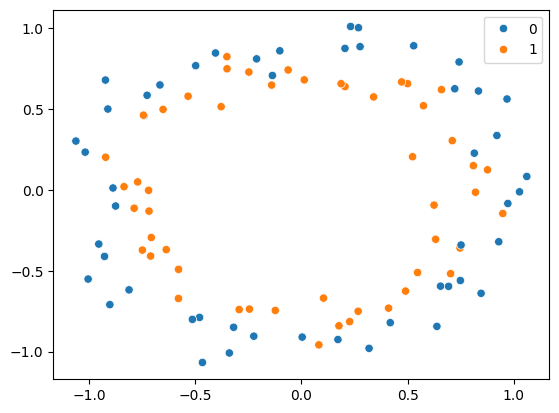

In [4]:
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [6]:
#model = Sequential()
#model.add(Dense(256, input_dim=2, activation='relu'))
#model.add(Dense(1, activation='sigmoid'))

model1 = Sequential([
    Dense(256, activation='relu', input_shape=(2,)),
    Dense(1, activation='sigmoid')
])


C:\Users\navee\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
history = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, verbose=1)

Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 193ms/step - accuracy: 0.4875 - loss: 0.6936 - val_accuracy: 0.3000 - val_loss: 0.6975
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.5375 - loss: 0.6915 - val_accuracy: 0.4500 - val_loss: 0.6999
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.5250 - loss: 0.6899 - val_accuracy: 0.4000 - val_loss: 0.6997
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.5250 - loss: 0.6893 - val_accuracy: 0.4000 - val_loss: 0.7004
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.5250 - loss: 0.6880 - val_accuracy: 0.4000 - val_loss: 0.7019
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.5125 - loss: 0.6871 - val_accuracy: 0.4000 - val_loss: 0.7039
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.5125 - loss: 0.6864 - val_accuracy: 0.4500 - val_loss: 0.7060
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5125 - loss: 0.6858 - val_accuracy: 0.4000 - 

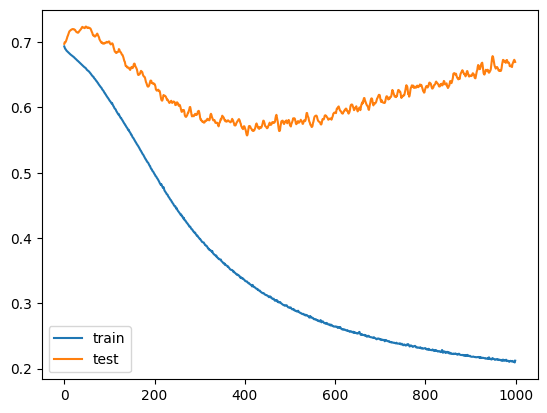

In [9]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step


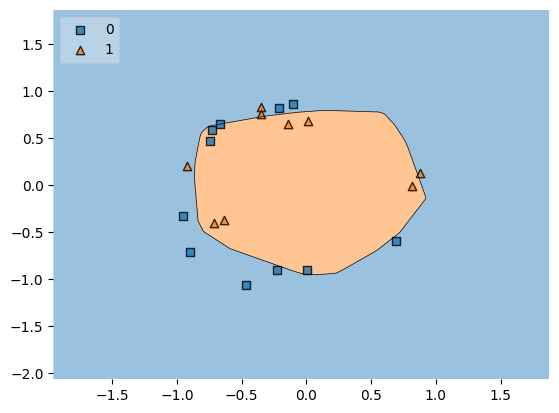

In [11]:
plot_decision_regions(X_test, y_test.ravel(), clf = model1, legend=2)
plt.show()

Early Stoping


In [12]:
model2 = Sequential([
    Dense(256, activation='relu', input_shape=(2,)),
    Dense(1, activation='sigmoid')
])

In [13]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
# early stoping 


callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.0000001,
    patience=30,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [17]:
history = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.5625 - loss: 0.6747 - val_accuracy: 0.3500 - val_loss: 0.7213
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.5625 - loss: 0.6741 - val_accuracy: 0.3500 - val_loss: 0.7223
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.5625 - loss: 0.6735 - val_accuracy: 0.3500 - val_loss: 0.7237
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.5750 - loss: 0.6726 - val_accuracy: 0.3500 - val_loss: 0.7246
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.5750 - loss: 0.6720 - val_accuracy: 0.3500 - val_loss: 0.7258
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.5750 - loss: 0.6713 - val_accuracy: 0.3500 - val_loss: 0.7274
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.5625 - loss: 0.6706 - val_accuracy: 0.3500 - val_loss: 0.7286
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.5625 - loss: 0.6701 - val_accuracy: 0.3500 - v

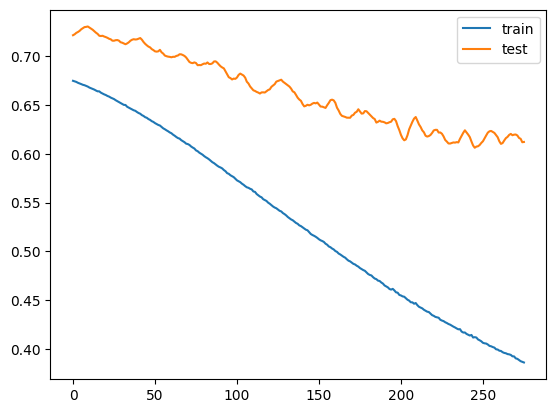

In [18]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


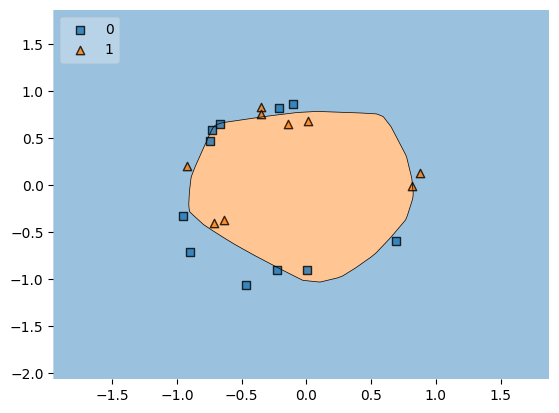

In [20]:
plot_decision_regions(X_test, y_test.ravel(), clf = model2, legend=2)
plt.show()